# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Individual Coding Challenge
Week 5 | Day 2

This is your first individual coding challenge. There are a series of exercises in this notebook that you will need to perform. This challenge to be done individually - **without help from either fellow students or the instructors**. You are free to use the documention or any online resources you choose. You will have one hour to complete this workbook. If you get stuck on one question keep moving.<br><br> **It must be submitted before 5pm via Slack**. <br><br>**- _NO LATE ENTRIES WILL BE ACCEPTED_ - <br><br>The Slack timestamp of submission will be definitive.**

### 1. Read in the csv at this link using pandas and save it as a DataFrame:
https://www.dropbox.com/s/1k9cgsd7bzce0yk/housing-data.csv?dl=1

In [56]:
import pandas as pd

In [57]:
df=pd.read_csv("housing-data.csv")

### 2. Get the datatypes of your DataFrame and find the 75th percentile of 'age' and 'price'

In [58]:
df.dtypes

sqft     int64
bdrms    int64
age      int64
price    int64
dtype: object

In [59]:
df.describe(percentiles=[.75]).iloc[5]

sqft       2269.0
bdrms         4.0
age          61.5
price    384450.0
Name: 75%, dtype: float64

### 3. Get the correlations for each column vs. the others. Which feature has the highest correlation with price?

In [60]:
df.corr()

,sqft,bdrms,age,price
sqft,1.000000,0.559967,0.079853,0.854988
bdrms,0.559967,1.000000,0.077486,0.442261
age,0.079853,0.077486,1.000000,0.051791
price,0.854988,0.442261,0.051791,1.000000


In [61]:
df.corr()['price'][0:-1] #sqft has max correlation

sqft     0.854988
bdrms    0.442261
age      0.051791
Name: price, dtype: float64

### 4. Plot the correlations and histograms using seaborn

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

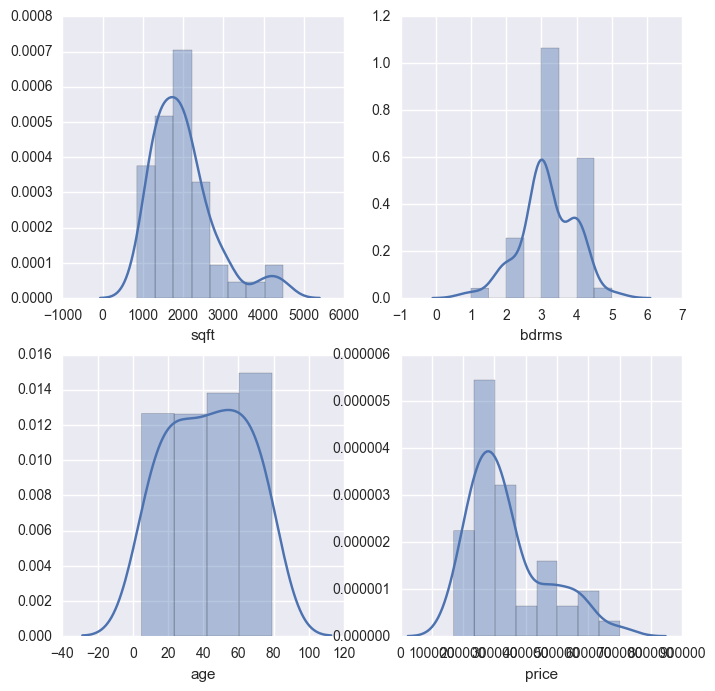

In [63]:
figure,axes=plt.subplots(2,2,figsize=(8,8))
i=0
for x in df.columns:
    i+=1
    plt.subplot(2,2,i)
    sns.distplot(df[x])
plt.show()

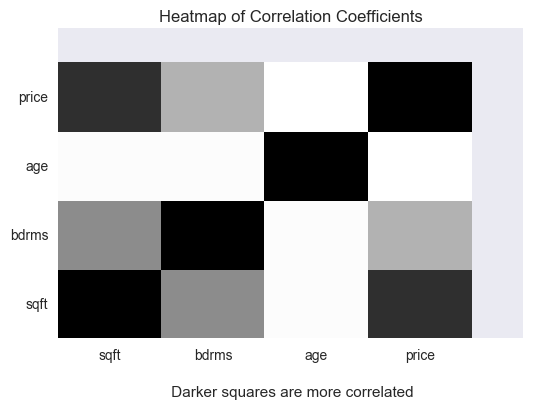

In [64]:
import numpy as np
plt.pcolor(df.corr())
plt.xticks(np.linspace(0.5,4.5,5),df.corr().index)
plt.yticks(np.linspace(0.5,4.5,5),df.corr().index)
plt.title("Heatmap of Correlation Coefficients")
plt.xlabel("\n Darker squares are more correlated")
plt.show()



### 5. Change the column names to uppercase using a list comprehension

In [65]:
df.columns=[x.upper() for x in df.columns]
df.head()

,SQFT,BDRMS,AGE,PRICE
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


### 6. Standardize each column - except price - using a list comprehension. Save the newly scaled columns to the DataFrame with the prepend 'SC_'. For example, 'SC_BDRMS'. You may use numpy for this. 

Refer to this if you are confused as to the formula: [Standardization](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling)

In [96]:
mean=0
std=0
copy=df.copy()
for x in df.columns:
    mean=np.mean(df[x])
    std=np.std(df[x])
    new_name="SC_"+x
    standardized=[(y-mean)/float(std) for y in df[x]]
    copy[new_name]=standardized

In [97]:
copy

,SQFT,BDRMS,AGE,PRICE,SC_SQFT,SC_BDRMS,SC_AGE,SC_PRICE
0,2104,3,70,399900,0.131415,-0.226093,1.204453,0.480890
1,1600,3,28,329900,-0.509641,-0.226093,-0.651589,-0.084983
2,2400,3,44,369000,0.507909,-0.226093,0.055474,0.231097
3,1416,2,49,232000,-0.743677,-1.554392,0.276432,-0.876398
4,3000,4,75,539900,1.271071,1.102205,1.425410,1.612637
5,1985,4,61,299900,-0.019945,1.102205,0.806730,-0.327501
6,1534,3,12,314900,-0.593589,-0.226093,-1.358653,-0.206242
7,1427,3,57,198999,-0.729686,-0.226093,0.629964,-1.143175
8,1380,3,14,212000,-0.789467,-0.226093,-1.270270,-1.038076
9,1494,3,15,242500,-0.644466,-0.226093,-1.226078,-0.791517


## 7. Use sk-learn's StandardScaler to confirm that your results are correct. You will need to read the documentation on how to use this.

[StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [98]:
from sklearn.preprocessing import StandardScaler

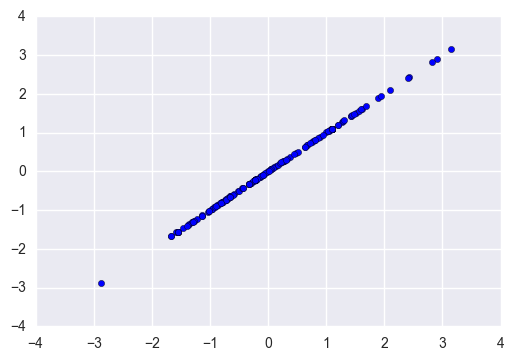

In [99]:
cols=[ u'SC_SQFT', u'SC_BDRMS', u'SC_AGE',u'SC_PRICE']
plt.scatter(copy[cols],fit)    

### 8. Using .apply() on your _DataFrame_, create a function that returns a count of the number of scaled columns that are positive. For example, if one scaled column is positive and two are negative, return 1. If all are negative return 0. Hint: It may be helpful to use .apply() on just a portion of your DataFrame. Save this new column as 'POS'.

In [109]:
def fun(x):
    a=x[0]
    b=x[1]
    c=x[2]
    d=x[3]
    count=0
    l=[a,b,c,d]
    for i in l:
        if i>=0:
            count+=1
    return count
    

In [112]:
#I made the assumption that if a value was 0, it was postiive; shouldnt be important though
copy["POS"]=copy[cols].apply(fun, axis=1)

In [114]:
copy.head()

,SQFT,BDRMS,AGE,PRICE,SC_SQFT,SC_BDRMS,SC_AGE,SC_PRICE,POS
0,2104,3,70,399900,0.131415,-0.226093,1.204453,0.480890,3
1,1600,3,28,329900,-0.509641,-0.226093,-0.651589,-0.084983,0
2,2400,3,44,369000,0.507909,-0.226093,0.055474,0.231097,3
3,1416,2,49,232000,-0.743677,-1.554392,0.276432,-0.876398,1
4,3000,4,75,539900,1.271071,1.102205,1.425410,1.612637,4


### 9. Using a lambda function with .apply() return a 1 if the price is above the mean price and a 0 if not. Save this new column as 'HIGH_PRICE'.

In [115]:
copy["HIGH_PRICE"]=copy["SC_PRICE"].apply(lambda x: 1 if x>=0 else 0)

In [116]:
copy.head()

,SQFT,BDRMS,AGE,PRICE,SC_SQFT,SC_BDRMS,SC_AGE,SC_PRICE,POS,HIGH_PRICE
0,2104,3,70,399900,0.131415,-0.226093,1.204453,0.480890,3,1
1,1600,3,28,329900,-0.509641,-0.226093,-0.651589,-0.084983,0,0
2,2400,3,44,369000,0.507909,-0.226093,0.055474,0.231097,3,1
3,1416,2,49,232000,-0.743677,-1.554392,0.276432,-0.876398,1,0
4,3000,4,75,539900,1.271071,1.102205,1.425410,1.612637,4,1


### 9. Using a minimum of 3 feature columns (not 'PRICE'), set a design matrix (X).  Next set a target vector (y). The target vector should be the 'HIGH_PRICE' column you just created.

In [118]:
copy.columns

Index([u'SQFT', u'BDRMS', u'AGE', u'PRICE', u'SC_SQFT', u'SC_BDRMS', u'SC_AGE',
       u'SC_PRICE', u'POS', u'HIGH_PRICE'],
      dtype='object')

In [132]:
independent=[u'SC_SQFT', u'SC_BDRMS', u'SC_AGE']
x=copy[independent]
y=copy["HIGH_PRICE"]

### 10. Using sk-learn's GridSearchCV and k-nn, find the optimal hyper-parmaters. Set the number of folds to 3 and the k to the range from 1 to 5. What is the best k? What is the best score? What does this score represent?

In [133]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNeighborsClassifier
from sklearn.cross_validation import train_test_split

In [134]:
klist=range(1,6)
kneigh=KNeighborsClassifier()
gs=GridSearchCV(kneigh, {'n_neighbors':klist},cv=3)
gs.fit(x,y)
print "Best k value is: ",gs.best_params_["n_neighbors"]
print "Best Score is:   ",gs.best_score_
#The score represents how well the model correctly assigns the binary of 1 or 0 to the high_price
#High scores mean that the model works really well at predicting our binary values
#Low scores mean that the model is poor at predicting our binary values

Best k value is:  1
Best Score is:    0.702127659574


4

### Bonus: If you have time, re-run the model using the scaled feature columns using a logistic regression. Test which features are most important using a penalized regression. Which is better L1 or L2? What penalty (C) is optimal?

In [135]:
c_list=[10**z for z in range(-5,5)]
p_list=['l1','l2']
logreg=LogisticRegression(solver='liblinear')
gs=GridSearchCV(logreg,{'penalty':p_list,'C':c_list},cv=3)
gs.fit(x,y)

print "You should use the following penalizer: ",gs.best_params_["penalty"]
print "You should use the following inverse regularization value:",gs.best_params_["C"]

You should use the following penalizer:  l1
You should use the following inverse regularization value: 1
